# Natural Language Processing - Sentiment Analysis

by [Coursera Project Network](https://www.coursera.org/learn/twitter-sentiment-analysis/home/welcome)

<hr>

### Objective: 
Use Machine Learning techniques to identify key words and phrases and classify them as a detrimental or beneficial review (positive or negative).

<hr>

### Step 1: Import Dependencies

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

<hr>

### Step 2: Load the data and observe

In [79]:
tweets_df = pd.read_csv("resources/twitter.csv")
tweets_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


#### Note: This is a supervised learning method of sentiment analysis. Notice how the 'label' is binary 0 or 1. The model will be trained on this output variable. 

- 0 stands for a positive sentiment
- 1 stands for a negative sentiment

In [80]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [81]:
tweets_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


### Step 2a: Monitor the tweets to make sure the dataset makes sense

In [82]:
tweets_df['tweet'][:10]

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
5    [2/2] huge fan fare and big talking before the...
6     @user camping tomorrow @user @user @user @use...
7    the next school year is the year for exams.ð...
8    we won!!! love the land!!! #allin #cavs #champ...
9     @user @user welcome here !  i'm   it's so #gr...
Name: tweet, dtype: object

<hr>

### Step 3: Data Preprocessing

In [83]:
# Drop the ID column because it is unnecessary

tweets_df = tweets_df.drop(['id'], axis=1)
tweets_df.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


c:\users\gianm\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

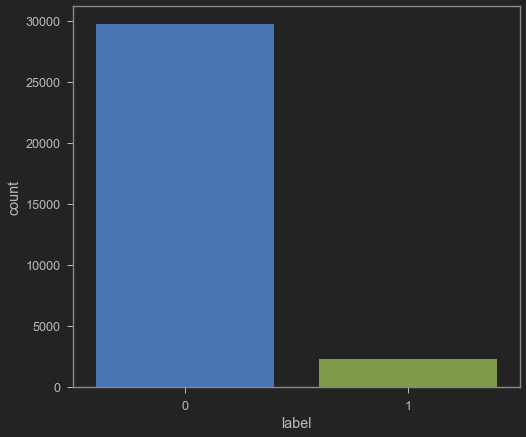

In [84]:
# Histogram showing the data. Amount of positive vs Amount of negative that is in my data

# tweets_df.hist(bins = 30, figsize=(13,5), color="b")
sns.countplot(tweets_df['label'], label = 'count')

<strong>Notice the difference in positive tweets and negative tweets.</strong>

<AxesSubplot:>

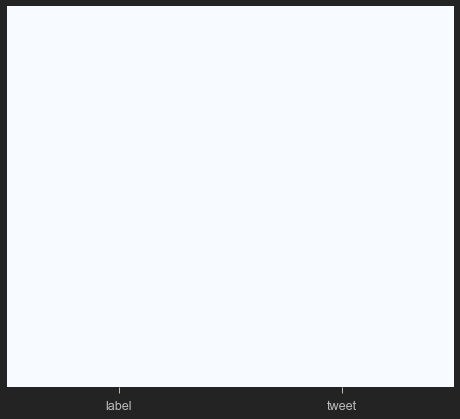

In [85]:
# Check for any null values
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

# Empty = no null values

In [86]:
# Create a new column in the dataframe that has the length of each tweet
tweets_df['length'] = tweets_df['tweet'].apply(len)

tweets_df.head(10)

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39
5,0,[2/2] huge fan fare and big talking before the...,116
6,0,@user camping tomorrow @user @user @user @use...,74
7,0,the next school year is the year for exams.ð...,143
8,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,0,@user @user welcome here ! i'm it's so #gr...,50


,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


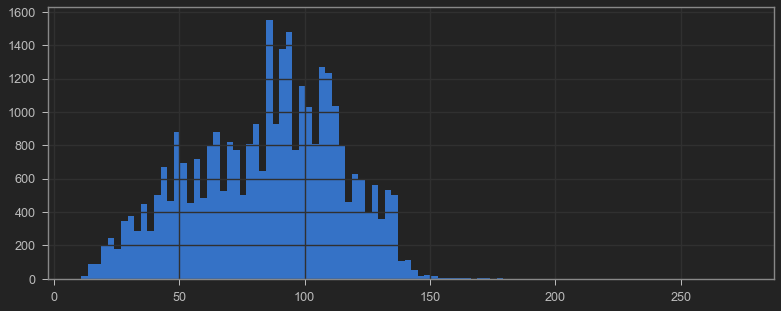

In [87]:
# Plot the length of the tweets to see a holistic view of the length of tweets in the data
tweets_df['length'].hist(bins = 100, figsize=(13,5), color="b")

tweets_df.describe()

# tweets_df['length'].plot(bins=100, kind='hist')

<strong>It looks like the average length of tweets is around 80-100.</strong>

In [88]:
# Knowing min and max lengths, I want to see the longest and shortest tweet in the data
shortest = tweets_df[tweets_df['length'] == 11]['tweet'].iloc[0]
longest = tweets_df[tweets_df['length'] == 274]['tweet'].iloc[0]
average = tweets_df[tweets_df['length'] == 84]['tweet'].iloc[0]

print(f"Shortest Tweet: {shortest}")
print("-" * 10)
print(f"Longest Tweet: {longest}")
print("-" * 10)
print(f"Average Tweet: {average}")

Shortest Tweet: i love you 
----------
Longest Tweet:  @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ðððððððððððð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð±ð±ð¤ð¤ð±ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ð¤ðððððððâ¦
----------
Average Tweet: my mom shares the same bihday as @user   bihday snake! see you this weekend ðð¼


In [89]:
# Put all positive tweets in a variable. Again for negative tweets
positive = tweets_df[tweets_df['label'] == 0]
negative = tweets_df[tweets_df['label'] == 1]